In [1]:
#091019, 091210
#read in the scores and answer attributions for each story for pilot ii. 
#i: plot the average score for each question for each story 
#ii: plot the average score for location questions and for social questions for each story
# and find the average score for all location questions and all social questions and plot as the last column
#iii: plot the average score for each question for each story separated into location-primed and social-primed participants
#iv: average across all the location questions and social questions for each condition
#v: the difference between the location score average and the social score average for each story for each condition
#a higher value means that the participant scored higher on the location questions, and negative, higher scoring on 
#the social
#vi: plot the difference of the difference of the social primed and location primed participants avg location and social
#question scoring. a postive difference indicates that there was an effect in the expected direction that location-priming
#and/or social-priming improved scores for their respective set of questions
#vii: do same analyses in steps i - vi, with the modification that the misattributions are left in
#viii:do the same analyses in steps i - vi, with the modification that the misattributions are removed
#ix: analysis of the misattributions
##step 1: per story, more location questions or more social questions that have answers w misattributed details
#question: do participants make more misattributions to location or social questions?
##step 2: per story, more location primed or social primed participants that have answers w misattributed details
#question: do participants make more misattributions with social or location perspective?
##step 3: per story, more misattributions to primed questions or unprimed questions
#do participants make more misattributions for questions they are primed for or ones they aren't primed for?

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib.patches as mpatches

plotly.tools.set_credentials_file(username='amr7', api_key='4gj9vxlD7C63cCRCaRdU')

#iMac
#directory = '/Users/alexreblando/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ebs/usable_data'

#laptop
directory = '/Users/alexreblando/Documents/Baldassano Lab/question_answers_alex_scored'

filenames = glob.glob(directory+ '/*.xlsx')

rs_dfs = []

for filename in filenames:
    rs_dfs.append(pd.read_excel(filename))
    
print('done!')

done!


In [3]:
#extract the columns from the question scores files (which include the participants' written answers)
columns_wanted = ['participant', 'schema', 'q1', 'a1', 'q2', 'a2', 'q3', 'a3', 'q4', 'a4', 'q5', \
                  'a5','q6', 'a6','q7', 'a7','q8', 'a8',]
story_scores = {}
for j in range(len(rs_dfs)):
    story_name = rs_dfs[j]['story'].iloc[1]
    df = pd.DataFrame()
    for i in columns_wanted:
        df[i] = rs_dfs[j][i]
    story_scores[story_name] = df

/Users/alexreblando/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



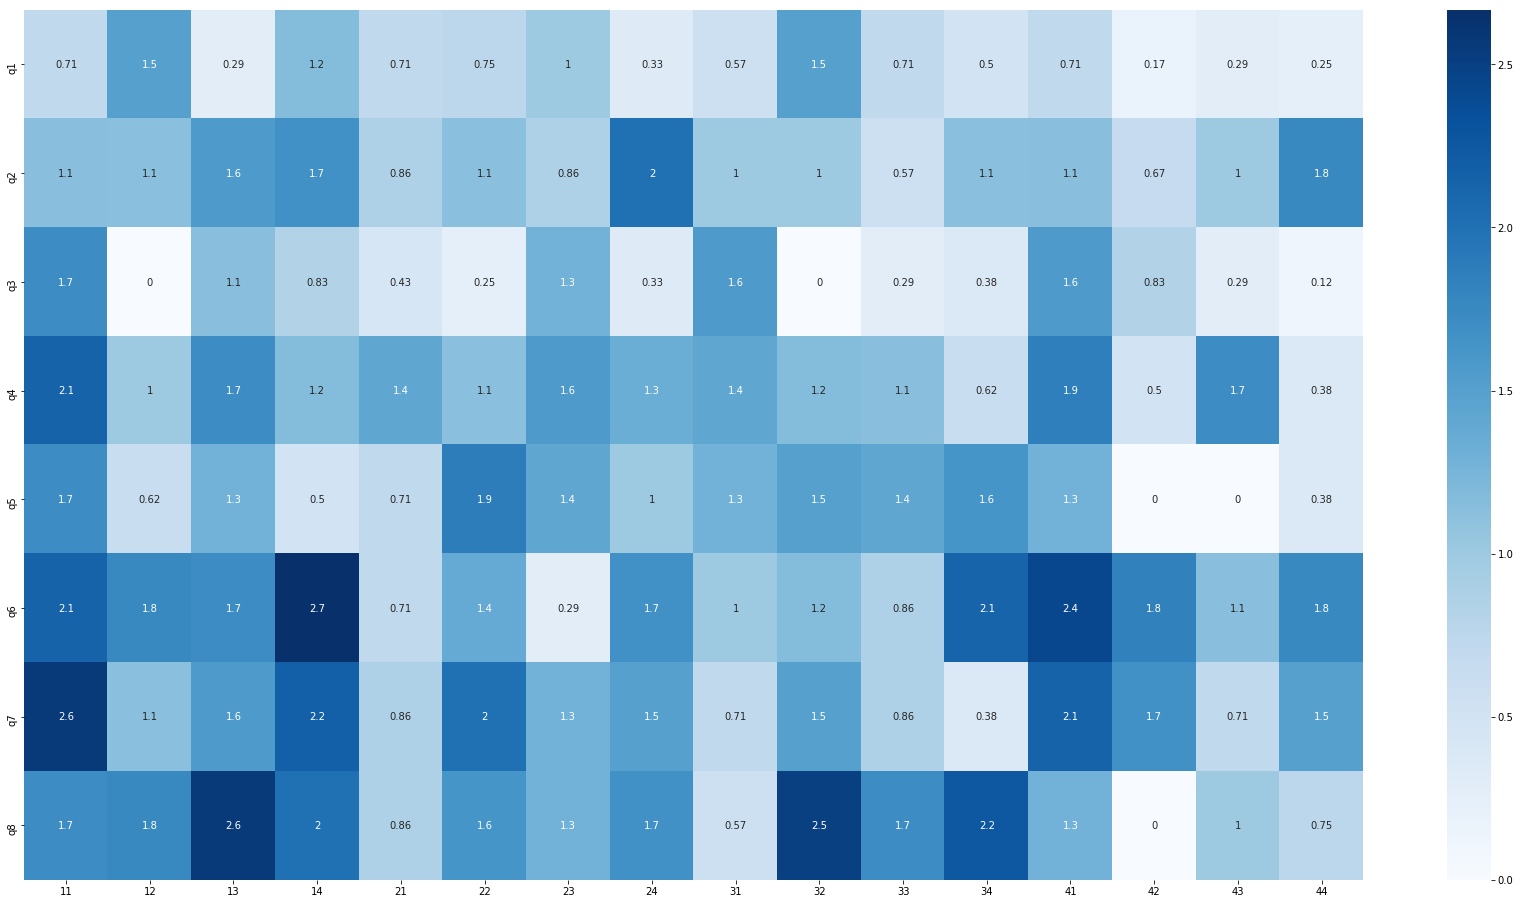

In [4]:
#analysis i: first, iterate through each story and find where there are misattributions. Where there is a 
#misattribution, mark the place where the misattribution is with a zero in the deep copied story_scores 'story_scores_edited', so 
#that any misattributions are in fact counted as wrong in the analysis of averaging the scores. Then, average down the column
#for each question for each story. And put the averages for each story into the pandas dataframe 'question_averages'.
#plot the average for each question for each story
#additional: creates two misattributions dictionaries one organized by stories 

story_list_int = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
question_list = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8']
annotation_list = ['a1', 'a2', 'a3', 'a4','a5','a6', 'a7', 'a8']
story_scores_edited = copy.deepcopy(story_scores)
question_averages = pd.DataFrame()
misattributions_bystory = dict()
misattributions_byperson = dict()

for k in story_list_int:
    story_q_averages = []
    for i in range(len(question_list)):
        for j in range(len(story_scores[k].index)):
            if story_scores[k][annotation_list[i]].iloc[j] == k:
                continue
            else: 
                story_scores_edited[k][question_list[i]].iloc[j] = 0
                #create lists of info to be put into the dictionaries
                ##list1: [participant id, schema type, question]
                ##list2: [story, schema type, question]
                list1 = [story_scores[k]['participant'].iloc[j], story_scores[k]['schema'].iloc[j], question_list[i]]
                list2 = [k, story_scores[k]['schema'].iloc[j], question_list[i]]
                #put the misattribution into the misattributions dictionary organized by story
                if k in misattributions_bystory:
                    misattributions_bystory[k] = np.vstack((misattributions_bystory[k], list1))
                else:
                    misattributions_bystory[k] = list1
                #put the misattribution into the misattributions dictionary organized by person
                if story_scores[k]['participant'].iloc[j] in misattributions_byperson:
                    misattributions_byperson[story_scores[k]['participant'].iloc[j]] = np.vstack((misattributions_byperson[story_scores[k]['participant'].iloc[j]], list2))
                else:
                    misattributions_byperson[story_scores[k]['participant'].iloc[j]] = list2
        story_q_averages.append(story_scores_edited[k][question_list[i]].mean())
    question_averages[k] = story_q_averages
    
question_averages = question_averages.rename({0: 'q1', 1: 'q2', 2: 'q3', 3: 'q4', 4: 'q5', 5: 'q6', 6: 'q7', 7: 'q8'}, axis='index') 
plt.figure(figsize=(30,16))
sns.heatmap(question_averages, annot=True, cmap="Blues")

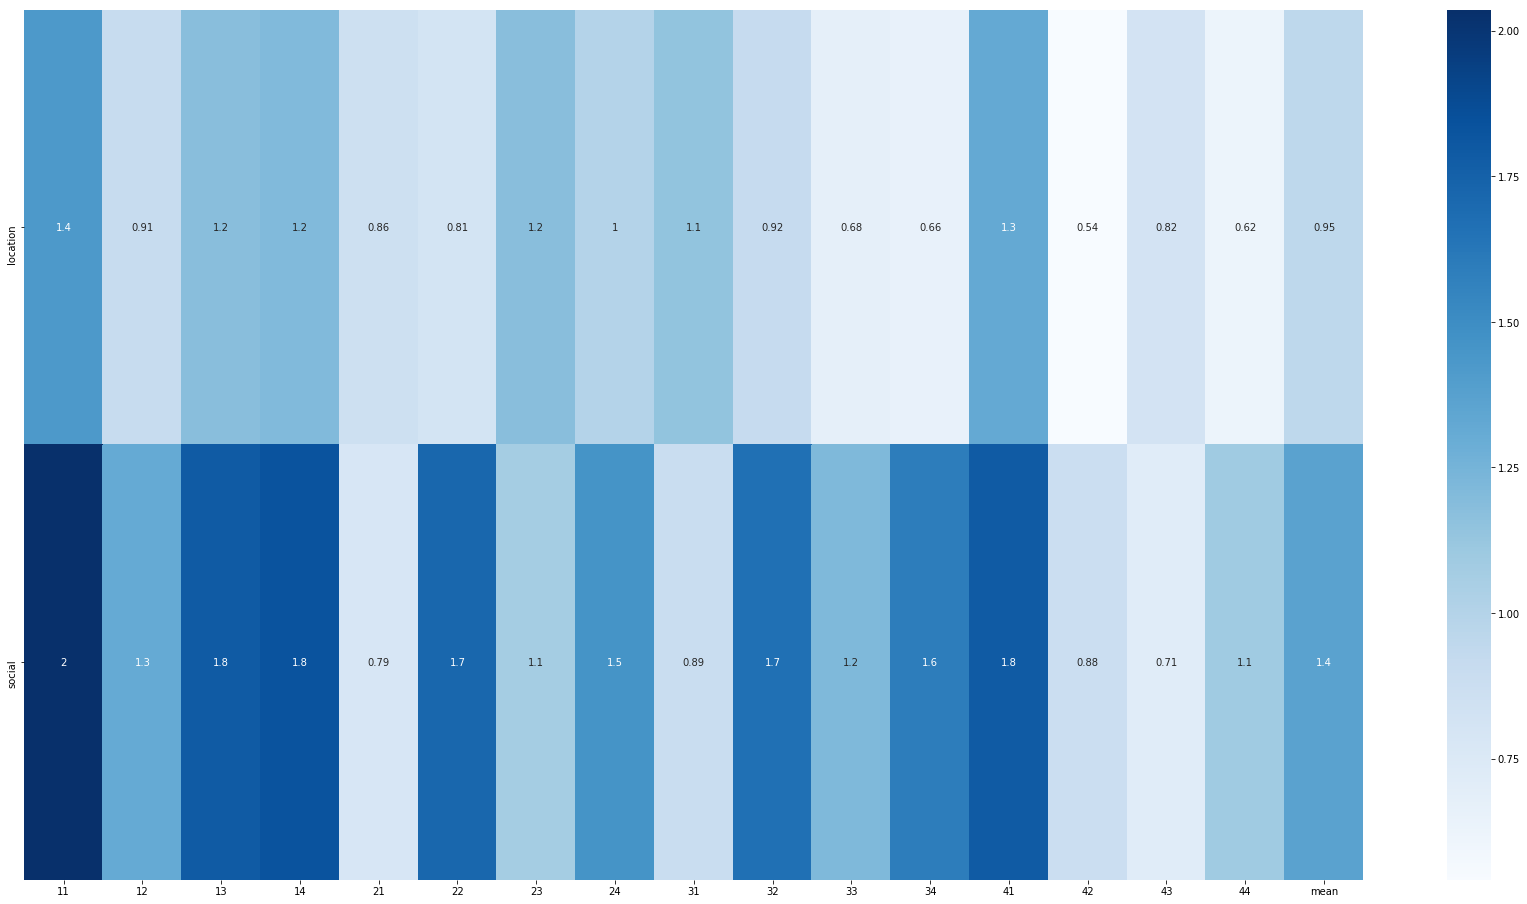

In [5]:
#analysis ii: average all the location question scores and all the social question scores and plot them 
#the last column is the average of all the location question scores, and all the social question scores
#indicating that participants score on average higher on social questions than location questions. 

loc_soc_avgs = pd.DataFrame()

for k in story_list_int:
    loc_avg = question_averages[k]['q1':'q4'].mean()
    soc_avg = question_averages[k]['q5':'q8'].mean()
    loc_soc_avgs[k] = [loc_avg, soc_avg]
    
#make a column at the end for the mean social and location question scores of all the stories
loc_soc_avgs['mean'] = loc_soc_avgs.mean(axis=1)
loc_soc_avgs = loc_soc_avgs.rename({0: 'location', 1: 'social'}, axis='index') 
plt.figure(figsize=(30,16))
sns.heatmap(loc_soc_avgs, annot=True, cmap="Blues")


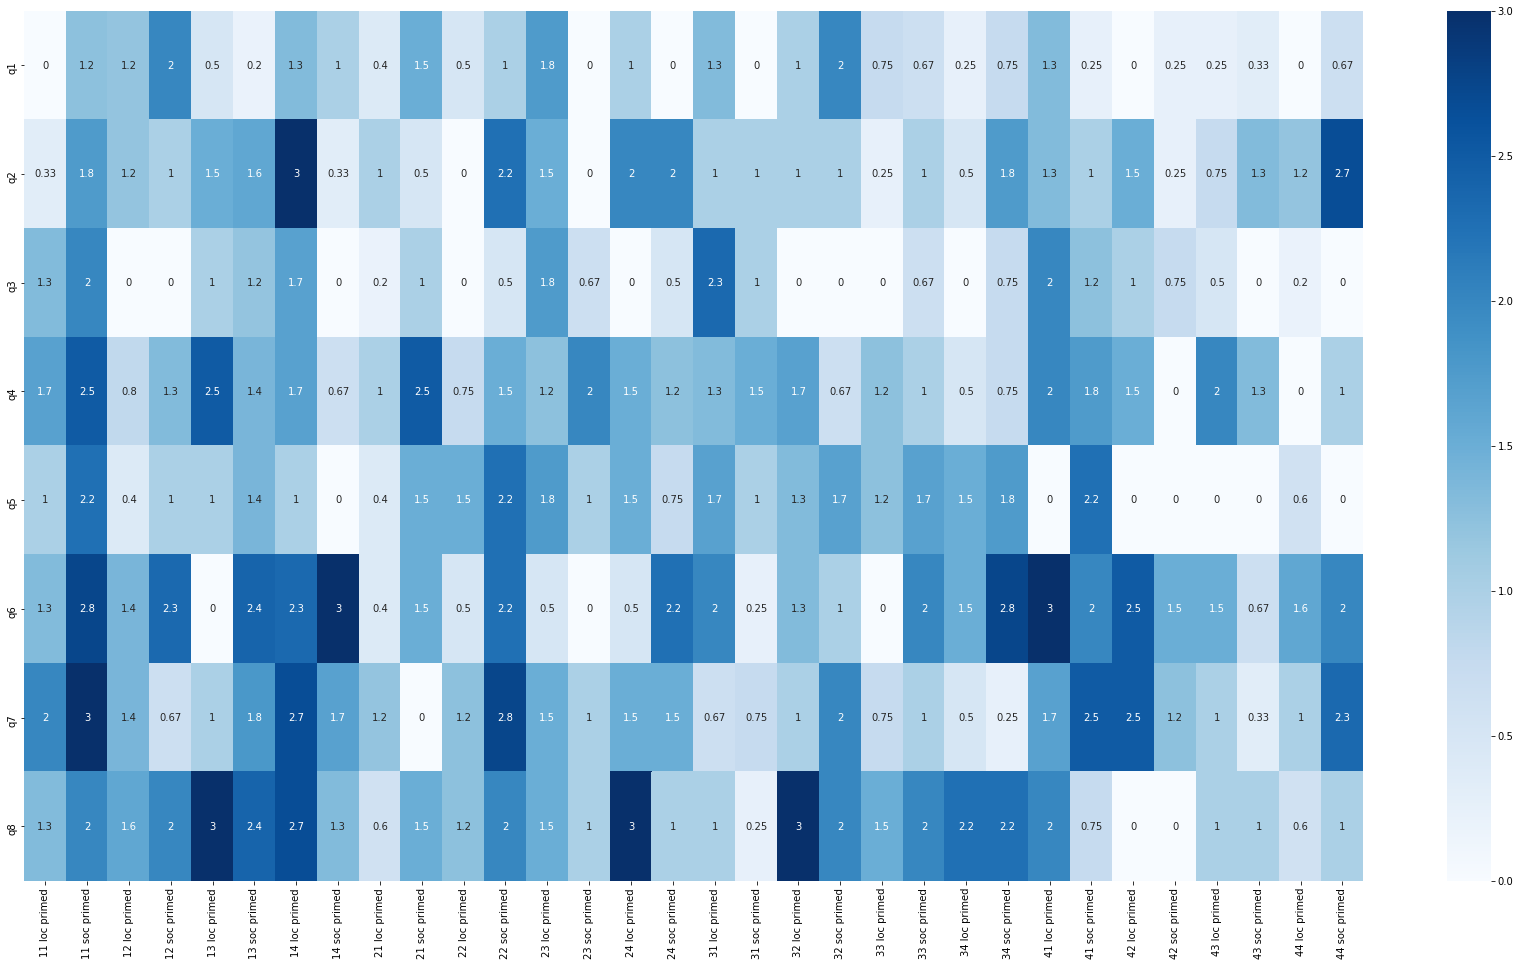

In [6]:
#analysis iii: 

loc_soc_question_averages = pd.DataFrame()
these_scores = []

for k in story_list_int:
    all_loc_scores = []
    all_soc_scores = []
    for i in question_list:
            loc_scores = []
            soc_scores = []
            for j in range(len(story_scores[k].index)):
                if story_scores[k]['schema'].iloc[j] == 'Location':
                    loc_scores.append(story_scores_edited[k][i].iloc[j])
                else:
                    soc_scores.append(story_scores_edited[k][i].iloc[j])
            all_loc_scores.append(np.mean(loc_scores))
            all_soc_scores.append(np.mean(soc_scores))
    loc_soc_question_averages[str(k) + ' loc primed'] = all_loc_scores
    loc_soc_question_averages[str(k) + ' soc primed'] = all_soc_scores
    

loc_soc_question_averages = loc_soc_question_averages.rename({0: 'q1', 1: 'q2', 2: 'q3', 3: 'q4', 4: 'q5', 5: 'q6', 6: 'q7', 7: 'q8'}, axis='index') 
loc_soc_question_averages
plt.figure(figsize=(30,16))
sns.heatmap(loc_soc_question_averages, annot=True, cmap="Blues")

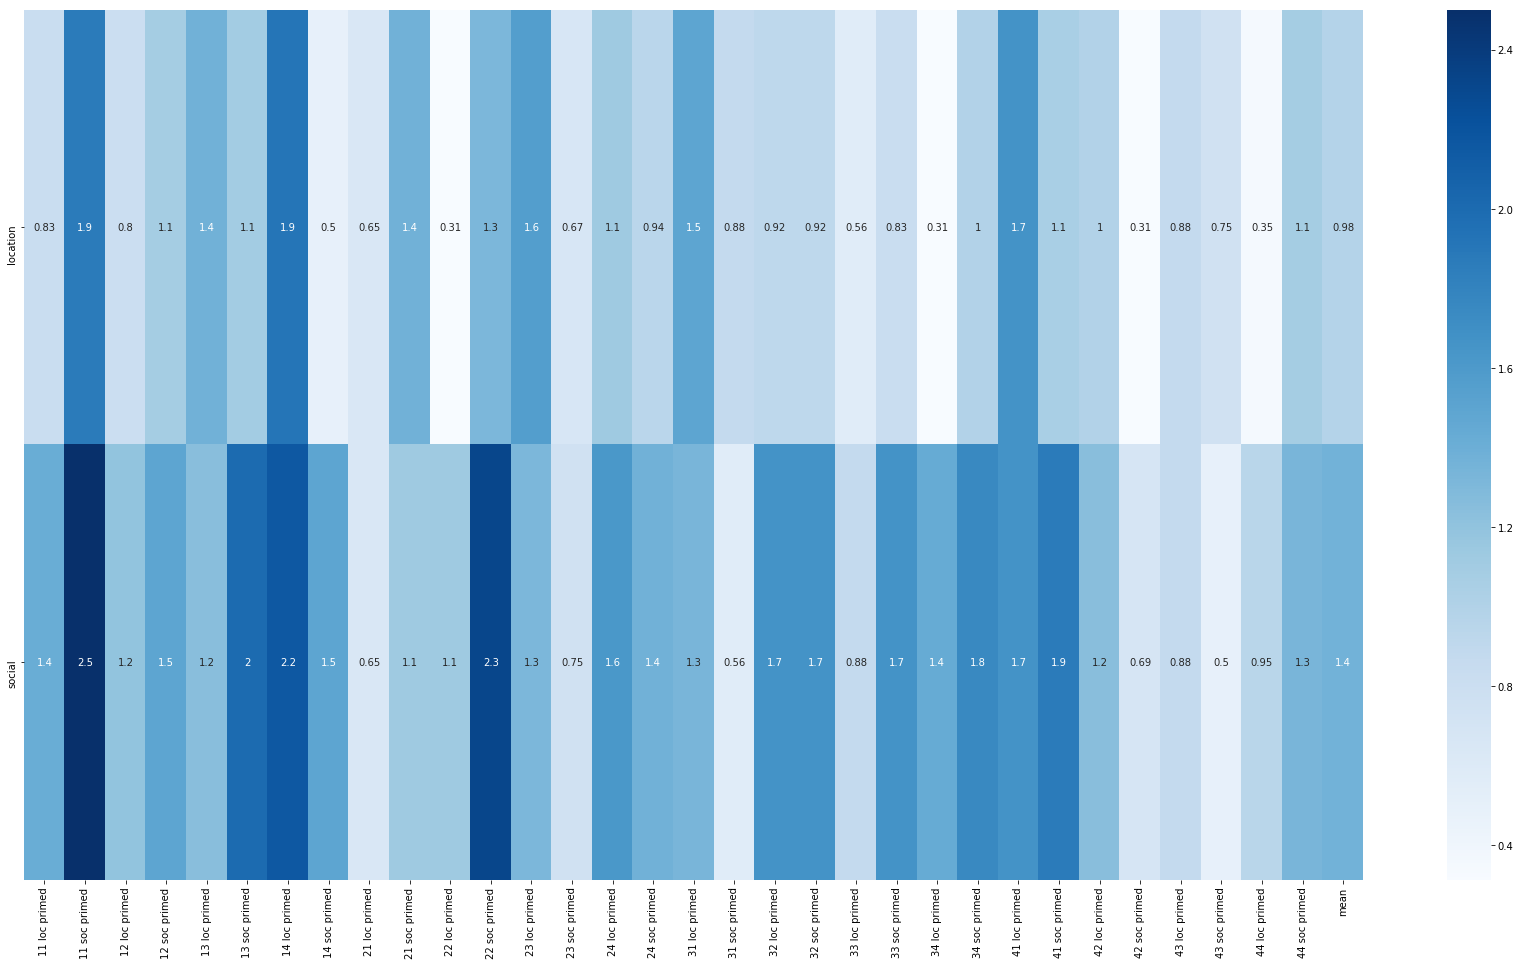

In [7]:
#analysis iv: average all the location question scores and all the social question scores for each condition and 
#plot them the last column is the average of all the location question scores, and all the social question scores
#it's still kind of difficult to make sense of this data

condition_separated_loc_soc_avgs = pd.DataFrame()
column_list = list(loc_soc_question_averages.columns)

for k in column_list:
    loc_avg = loc_soc_question_averages[k]['q1':'q4'].mean()
    soc_avg = loc_soc_question_averages[k]['q5':'q8'].mean()
    condition_separated_loc_soc_avgs[k] = [loc_avg, soc_avg]
    
condition_separated_loc_soc_avgs['mean'] = condition_separated_loc_soc_avgs.mean(axis=1)
condition_separated_loc_soc_avgs = condition_separated_loc_soc_avgs.rename({0: 'location', 1: 'social'}, axis='index') 
plt.figure(figsize=(30,16))
sns.heatmap(condition_separated_loc_soc_avgs, annot=True, cmap="Blues")


<function matplotlib.pyplot.show(*args, **kw)>

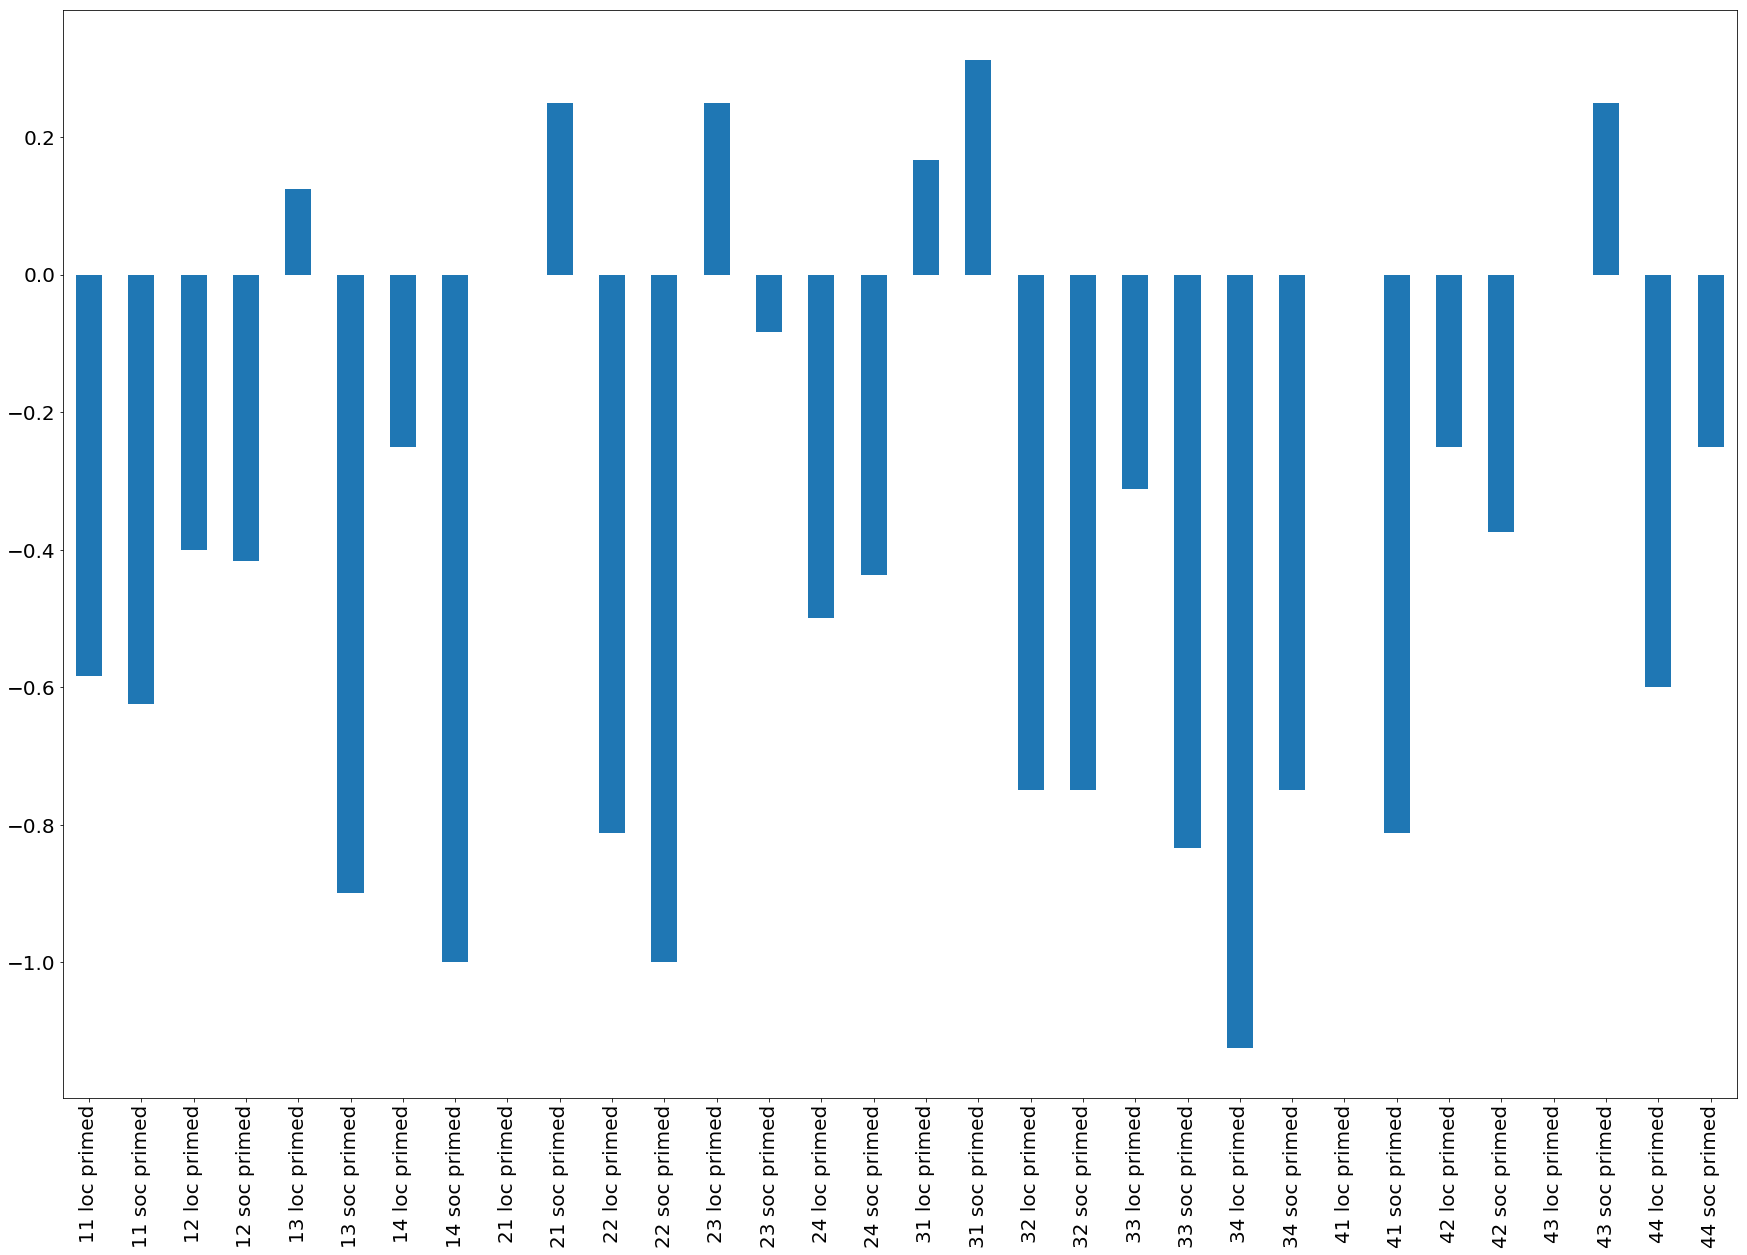

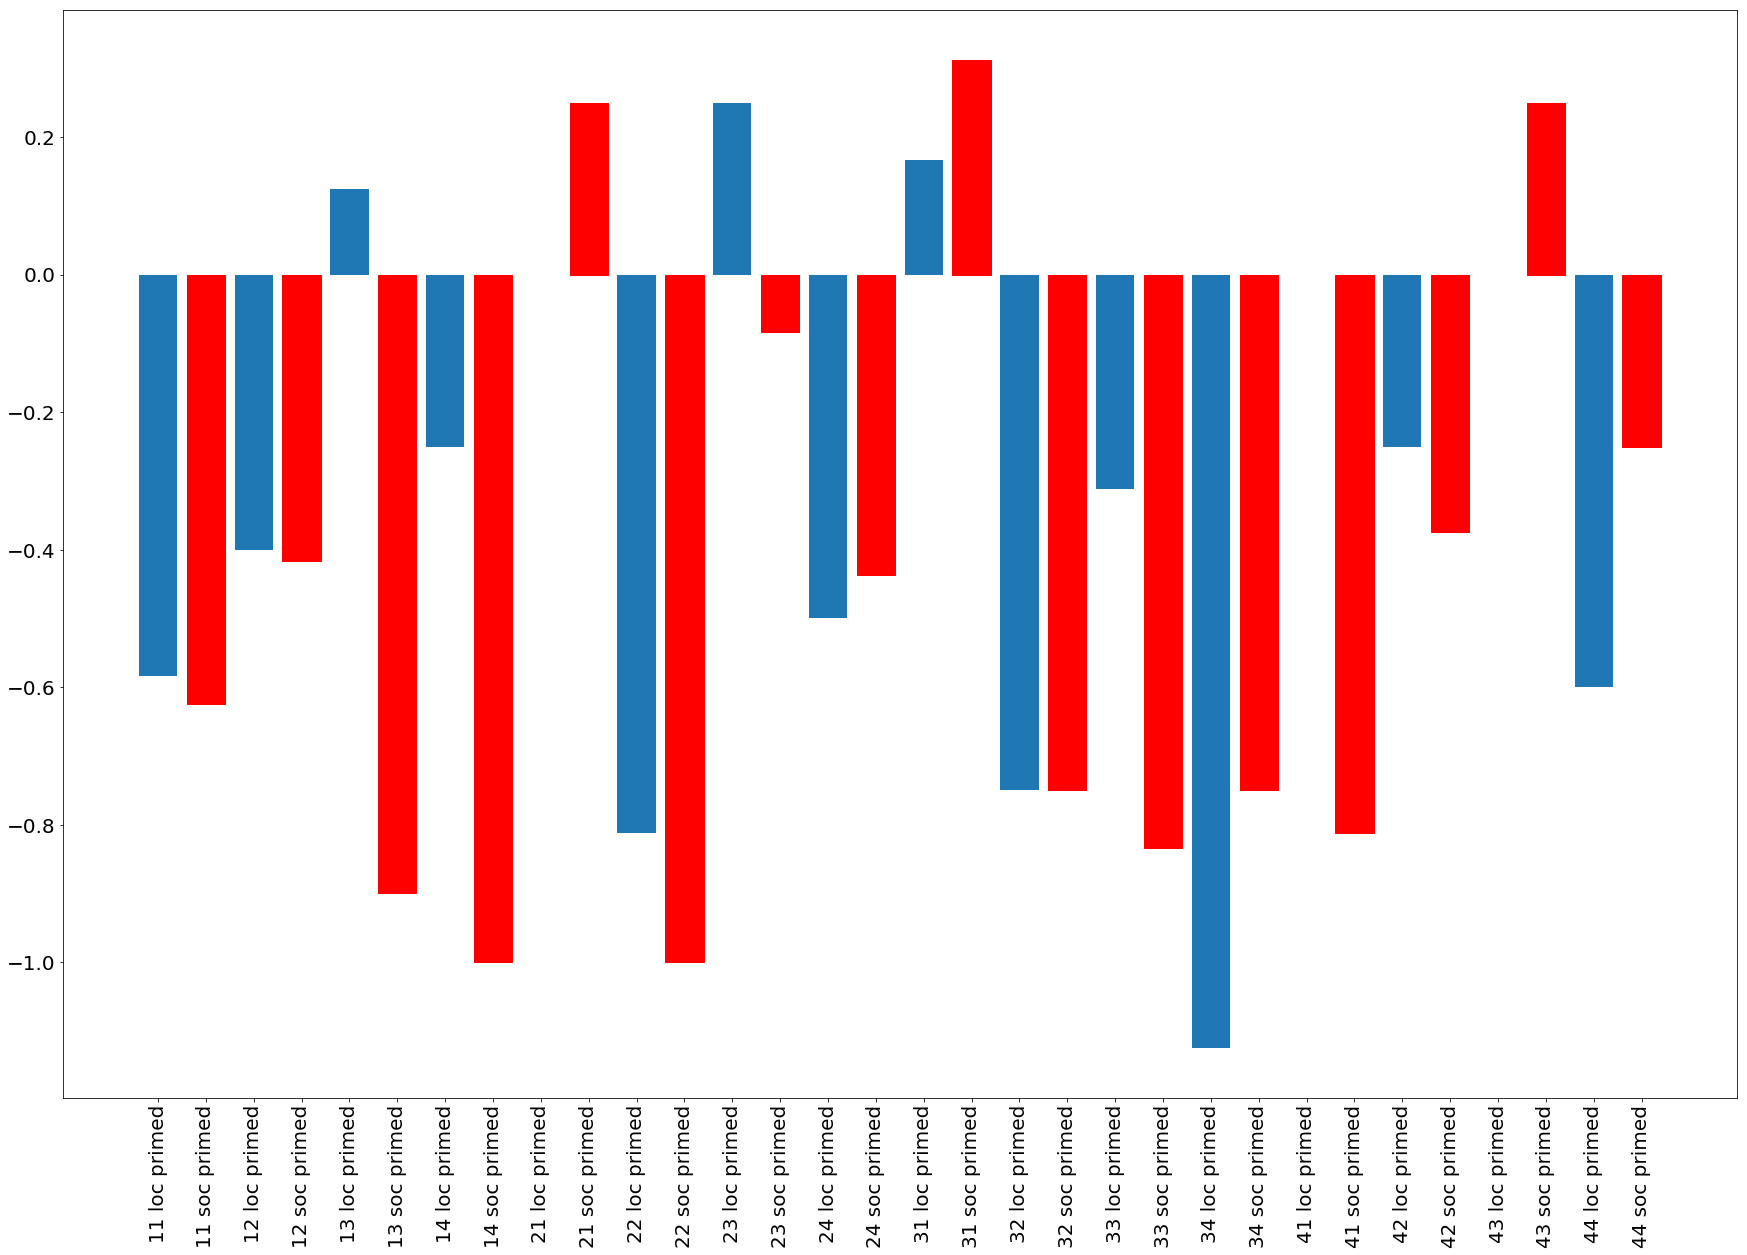

In [8]:
#analysis v: subtract the location average from the social average for each story for each condition. if the difference
#is negative then participants in that group are better at answering social questions, if positive, location. 
#inference: most groups including location-primed participants are better at answering social questions 


differences = pd.DataFrame()

for i in column_list:
    
    differences[i] =  [condition_separated_loc_soc_avgs[i]['location'] - condition_separated_loc_soc_avgs[i]['social']]
    
fig= plt.figure(figsize=(30,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
row = differences.iloc[0]
row.plot(kind='bar')
fig= plt.figure(figsize=(30,20))
barlist=plt.bar(column_list, row)
barlist[1].set_color('r')
barlist[3].set_color('r')
barlist[5].set_color('r')
barlist[7].set_color('r')
barlist[9].set_color('r')
barlist[11].set_color('r')
barlist[13].set_color('r')
barlist[15].set_color('r')
barlist[17].set_color('r')
barlist[19].set_color('r')
barlist[21].set_color('r')
barlist[23].set_color('r')
barlist[25].set_color('r')
barlist[27].set_color('r')
barlist[29].set_color('r')
barlist[31].set_color('r')
plt.xticks(rotation=90)
plt.show


16 16


(-0.5, 1.4)

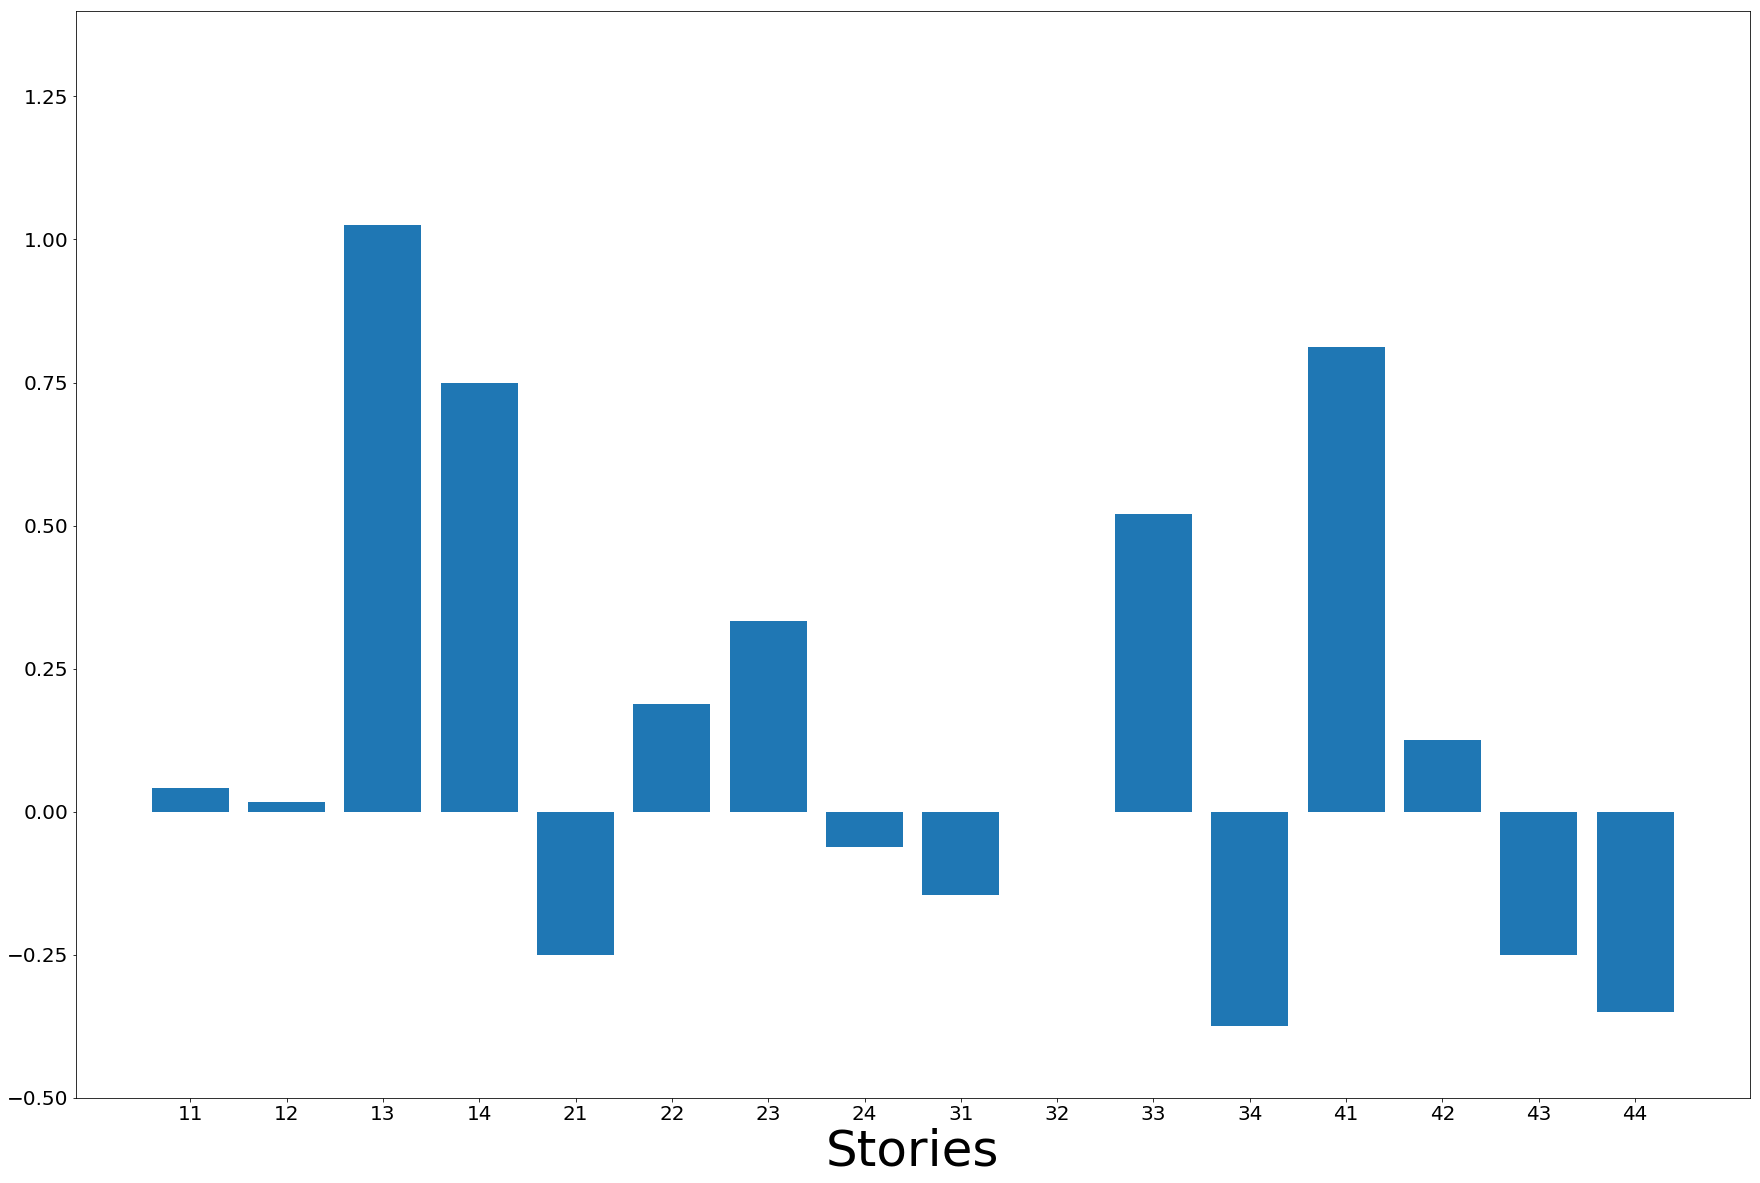

In [9]:
#analysis vi: plot the difference of the difference of social and location primed groups' social and location question
#score averages. A positive number indicates that the priming effect worked, meaning that social-primed participants
#scored higher than location-primed participants on social questions and/or (this analysis does not disambiguate) 
#location-primed participants socred higher than social-primed participants in location questions

story_list = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']

#add columns of differences of the differences in the 'differences' dataframe for each story
for key in story_list:
    if key in differences.columns:
        print('yes')
        break
    else:
        differences[key] = differences[key + ' loc primed'] - differences[key + ' soc primed']


row = differences.loc[:, '11':'44']
new_row = row.to_numpy()
new_row = new_row.ravel()
print(len(new_row), len(story_list))
fig= plt.figure(figsize=(30,20))
barlist=plt.bar(story_list, new_row)
# Add title and axis names
plt.xlabel('Stories', fontsize=50)
#plt.ylabel('Benefit of the primed event script on the short answer questions', fontsize=30)
plt.rc('xtick', labelsize=40)     
plt.rc('ytick', labelsize=20)
 
# Limits for the Y axis
plt.ylim(-.5,1.4)




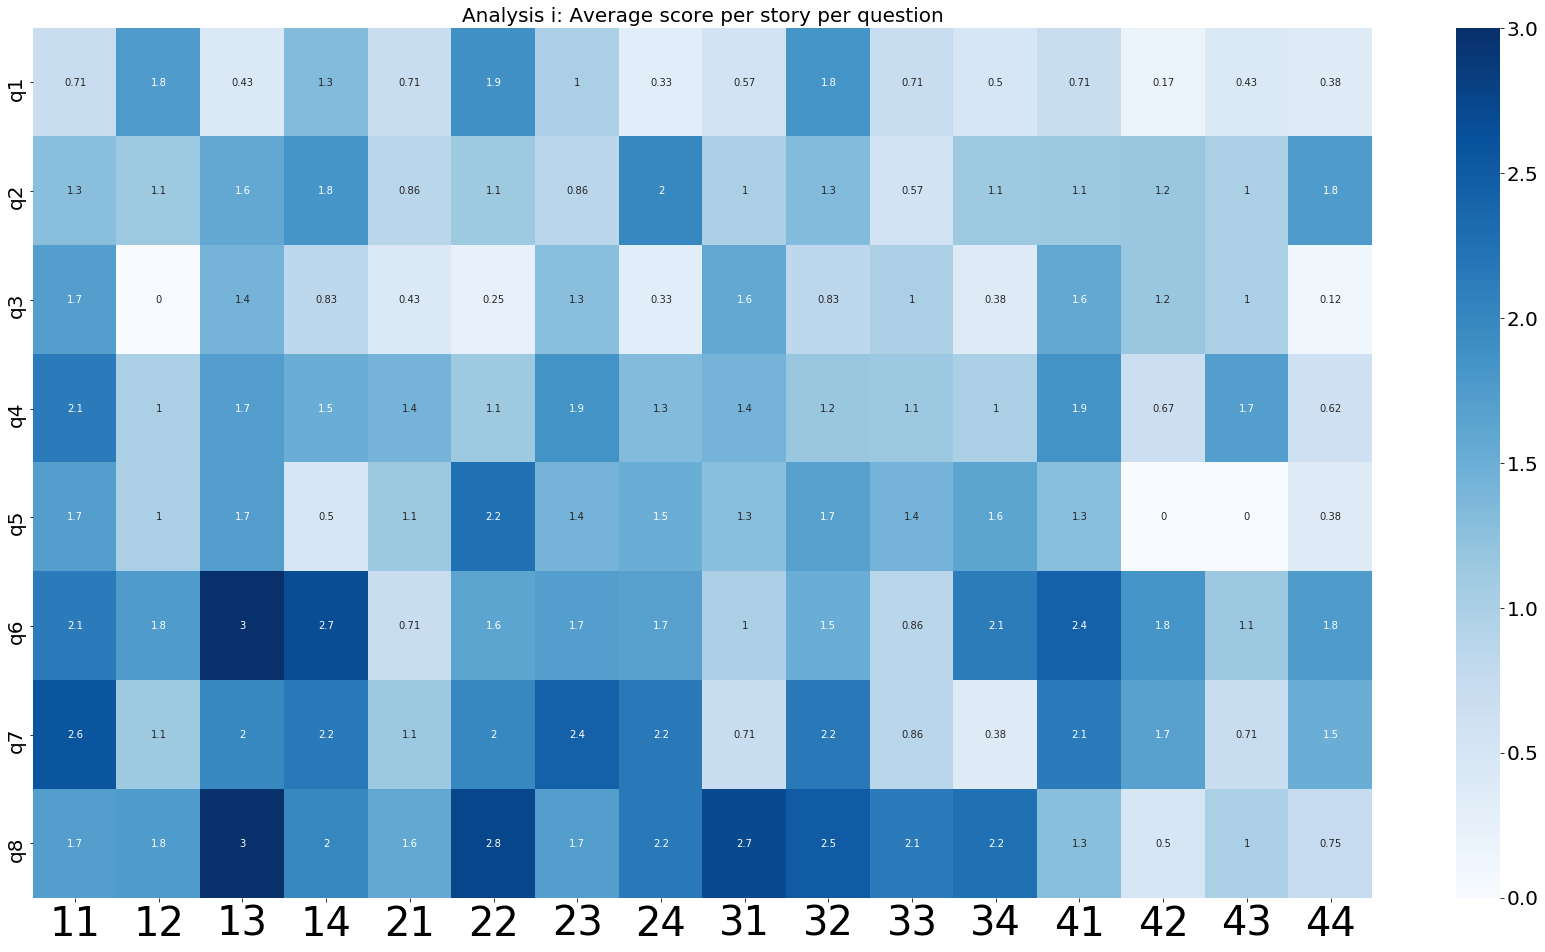

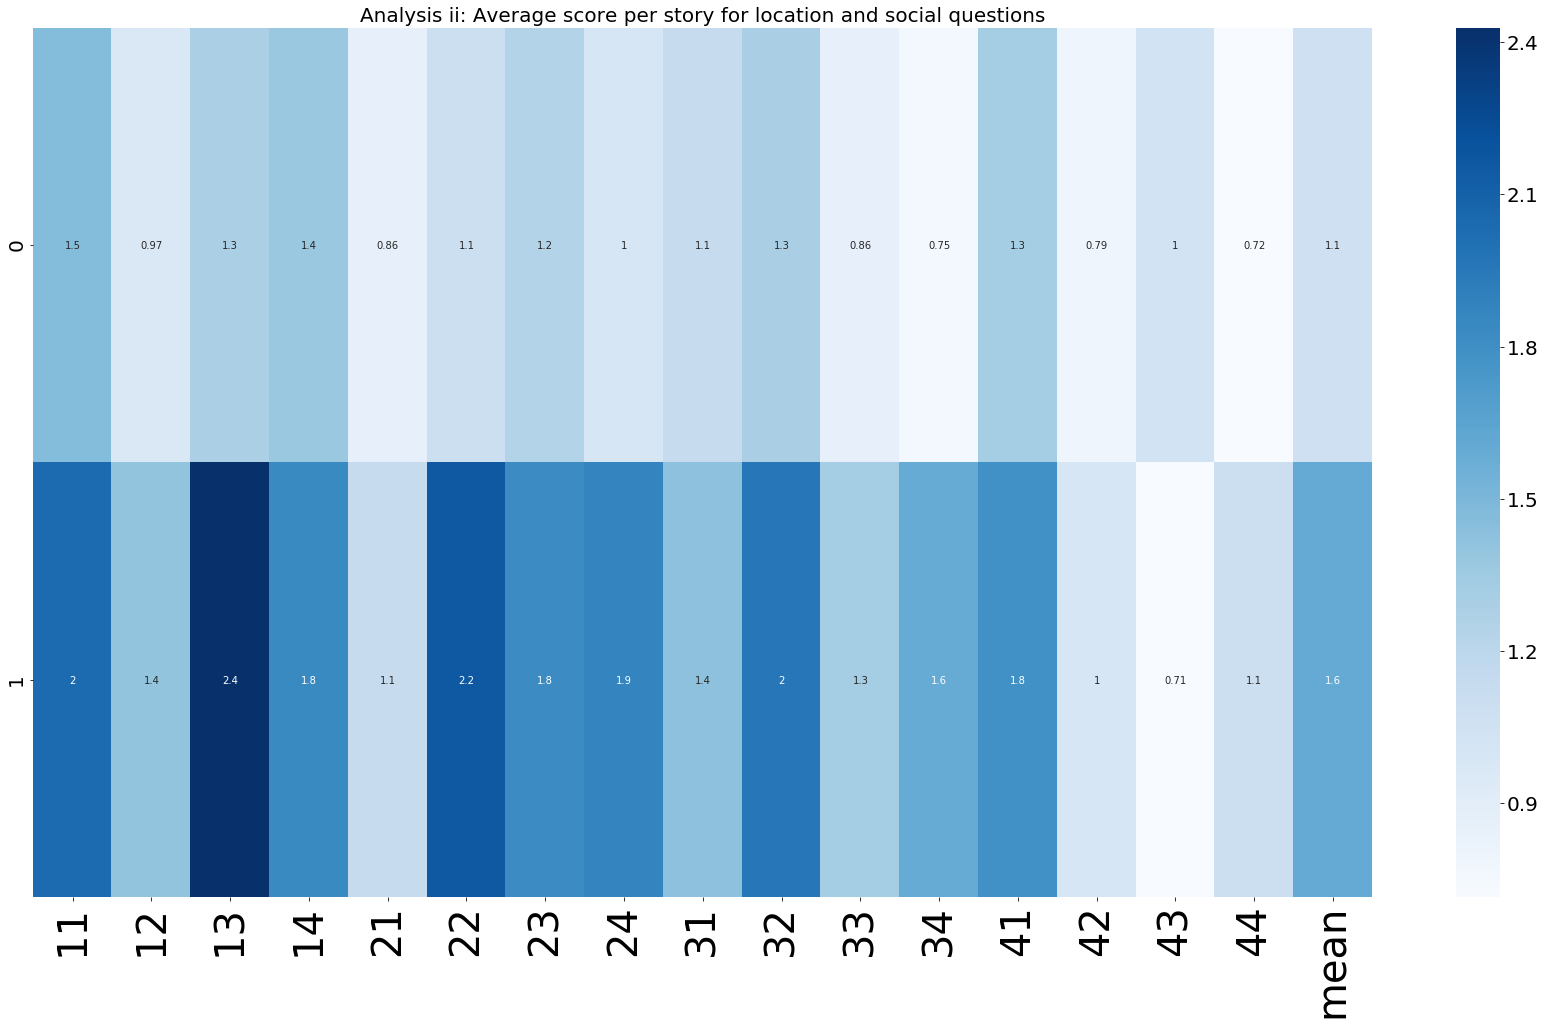

      11        12    13    14     21     22        23      24        31  \
0  0.125  0.233333  1.25  0.75 -0.225 -0.125  0.166667  0.1875 -0.083333   

         32        33      34      41     42        43   44  
0 -0.166667  0.645833 -0.4375  0.8125  0.875 -0.166667 -0.2  
16 16


(-0.5, 1.4)

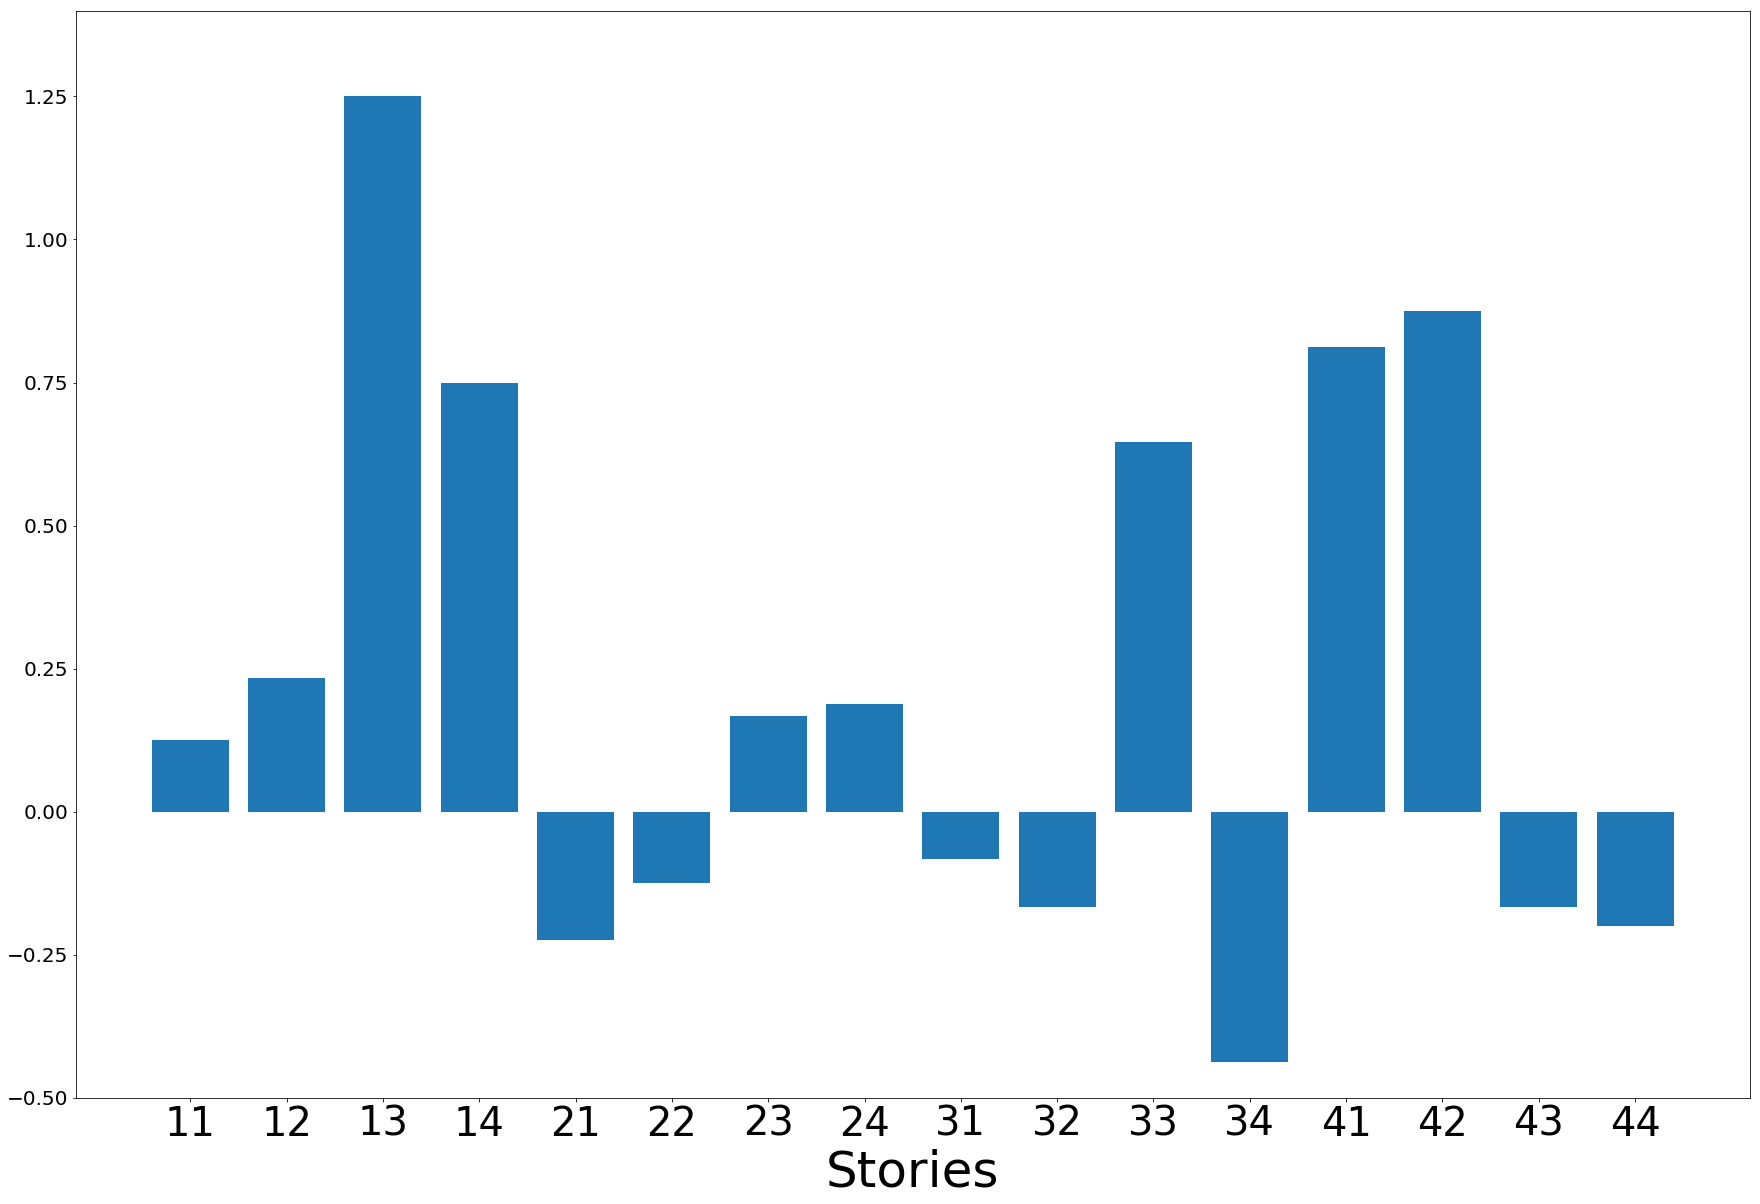

In [12]:
#analysis vii: all of analysis of steps i - vi but with the misattributions left in

##analysis i:
question_averages_mis_incl = pd.DataFrame()

for k in story_list_int:
    story_q_averages = []
    for i in range(len(question_list)):
        story_q_averages.append(story_scores[k][question_list[i]].mean())
    question_averages_mis_incl[k] = story_q_averages
    
question_averages_mis_incl = question_averages_mis_incl.rename({0: 'q1', 1: 'q2', 2: 'q3', 3: 'q4', 4: 'q5', 5: 'q6', 6: 'q7', 7: 'q8'}, axis='index') 
plt.figure(figsize=(30,16))
sns.heatmap(question_averages_mis_incl, annot=True, cmap="Blues")
plt.title("Analysis i: Average score per story per question", fontsize =20)
plt.show()

##analysis ii:
loc_soc_avgs_mis_incl = pd.DataFrame()

for k in story_list_int:
    loc_avg = question_averages_mis_incl[k]['q1':'q4'].mean()
    soc_avg = question_averages_mis_incl[k]['q5':'q8'].mean()
    loc_soc_avgs_mis_incl[k] = [loc_avg, soc_avg]
    
loc_soc_avgs_mis_incl['mean'] = loc_soc_avgs_mis_incl.mean(axis=1)
loc_soc_avgs = loc_soc_avgs.rename({0: 'location', 1: 'social'}, axis='index') 
plt.figure(figsize=(30,16))
sns.heatmap(loc_soc_avgs_mis_incl, annot=True, cmap="Blues")
plt.title("Analysis ii: Average score per story for location and social questions", fontsize =20)
plt.show()

#analysis iii: 

loc_soc_question_averages_mis_incl = pd.DataFrame()

for k in story_list_int:
    all_loc_scores = []
    all_soc_scores = []
    for i in question_list:
            loc_scores = []
            soc_scores = []
            for j in range(len(story_scores[k].index)):
                if story_scores[k]['schema'].iloc[j] == 'Location':
                    loc_scores.append(story_scores[k][i].iloc[j])
                else:
                    soc_scores.append(story_scores[k][i].iloc[j])
            all_loc_scores.append(np.mean(loc_scores))
            all_soc_scores.append(np.mean(soc_scores))
    loc_soc_question_averages_mis_incl[str(k) + ' loc primed'] = all_loc_scores
    loc_soc_question_averages_mis_incl[str(k) + ' soc primed'] = all_soc_scores
    

loc_soc_question_averages_mis_incl = loc_soc_question_averages_mis_incl.rename({0: 'q1', 1: 'q2', 2: 'q3', 3: 'q4', 4: 'q5', 5: 'q6', 6: 'q7', 7: 'q8'}, axis='index') 
#plt.figure(figsize=(30,16))
#sns.heatmap(loc_soc_question_averages_mis_incl, annot=True, cmap="Blues")
#plt.title("Analysis iii: Average score per story per question divided by primed schema", fontsize =20)
#plt.show()

#analysis iv: average all the location question scores and all the social question scores for each condition and 
#plot them the last column is the average of all the location question scores, and all the social question scores
#it's still kind of difficult to make sense of this data

condition_separated_loc_soc_avgs_mis_incl = pd.DataFrame()

for k in column_list:
    loc_avg = loc_soc_question_averages_mis_incl[k]['q1':'q4'].mean()
    soc_avg = loc_soc_question_averages_mis_incl[k]['q5':'q8'].mean()
    condition_separated_loc_soc_avgs_mis_incl[k] = [loc_avg, soc_avg]
    
condition_separated_loc_soc_avgs_mis_incl['mean'] = condition_separated_loc_soc_avgs_mis_incl.mean(axis=1)
condition_separated_loc_soc_avgs_mis_incl = condition_separated_loc_soc_avgs_mis_incl.rename({0: 'location', 1: 'social'}, axis='index') 
#plt.figure(figsize=(30,16))
#sns.heatmap(condition_separated_loc_soc_avgs_mis_incl, annot=True, cmap="Blues")
#plt.title("Analysis iv: Average score per story for location and social questions divided by primed schema", fontsize =20)
#plt.show()

#analysis v: subtract the location average from the social average for each story for each condition. if the difference
#is negative then participants in that group are better at answering social questions, if positive, location. 
#inference: most groups including location-primed participants are better at answering social questions 


differences_mis_incl = pd.DataFrame()

for i in column_list:
    
    differences_mis_incl[i] =  [condition_separated_loc_soc_avgs_mis_incl[i]['location'] - condition_separated_loc_soc_avgs_mis_incl[i]['social']]
    

#analysis vi: plot the difference of the difference of social and location primed groups' social and location question
#score averages. A positive number indicates that the priming effect worked, meaning that social-primed participants
#scored higher than location-primed participants on social questions and/or (this analysis does not disambiguate) 
#location-primed participants socred higher than social-primed participants in location questions

story_list = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']

#add columns of differences of the differences in the 'differences' dataframe for each story
for key in story_list:
    if key in differences_mis_incl.columns:
        print('yes')
        break
    else:
        differences_mis_incl[key] = differences_mis_incl[key + ' loc primed'] - differences_mis_incl[key + ' soc primed']


row_m = differences_mis_incl.loc[:, '11':'44']
print(row_m)
new_row_m = row_m.to_numpy()
new_row_m = new_row_m.ravel()
print(len(new_row_m), len(story_list))
fig= plt.figure(figsize=(30,20))
barlist=plt.bar(story_list, new_row_m)
# Add title and axis names
plt.xlabel('Stories', fontsize=50)
#plt.ylabel('Benefit of the primed event script on the short answer questions', fontsize=30)
plt.rc('xtick', labelsize=40)     
plt.rc('ytick', labelsize=20)
 
# Limits for the Y axis
plt.ylim(-.5,1.4)





In [75]:
#ix: analysis of the misattributions
##step 1
#part a: per story, more location questions or more social questions that have answers w misattributed details
#part b: per story, which questions do most participants miss
#question: do participants make more misattributions to location or social questions? 
##step 2: per story, more location primed or social primed participants that have answers w misattributed details
#question: do participants make more misattributions with social or location perspective?
##step 3: per story, more misattributions to primed questions or unprimed questions
#do participants make more misattributions for questions they are primed for or ones they aren't primed for?

In [74]:
#step 1:
#part a: per story, more location questions or more social questions that have answers w misattributed details
#question: do participants make more misattributions to location or social questions?

stories = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
loc_qs = ['q1', 'q2', 'q3', 'q4']
#df for organizing the number of location and social question misattributions per story
df_misat =pd.DataFrame({'x': ['Location', 'Social']})

for key in stories:
    #checking if that key has any entries
    if key not in misattributions_bystory.keys():
        continue
    #checking if there is only 1 entry for that story
    elif isinstance(misattributions_bystory[key], list):
        if misattributions_bystory[key][2] in loc_qs:
            df_misat[key] = [1,0]
        else:
            df_misat[key] = [0,1]
    else:
        loc_count = 0
        soc_count = 0 
        for i in range(len(misattributions_bystory[key])):
            if misattributions_bystory[key][i][2] in loc_qs:
                loc_count += 1
            else:
                soc_count += 1
        df_misat[key] = [loc_count, soc_count]
 
print(df_misat)

          x  11  12  13  14  21  22  23  24  31  32  33  34  42  43  44
0  Location   1   2   2   3   0   3   1   0   0   5   2   2   6   5   2
1    Social   0   1   6   0   5   6   8   4   5   5   1   0   2   0   0


In [80]:
#step 1:
##part b: per story, which questions do most participants miss
df_misat_qs =pd.DataFrame({'x': ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8']})

for key in stories:
    #checking if that key has any entries
    q1 = 0
    q2 = 0
    q3 = 0
    q4 = 0
    q5 = 0
    q6 = 0
    q7 = 0
    q8 = 0
    if key not in misattributions_bystory.keys():
        continue
    #checking if there is only 1 entry for that story
    elif isinstance(misattributions_bystory[key], list):
        if misattributions_bystory[key][2] is 'q1':
            df_misat_qs[key] = [1,0,0,0,0,0,0,0]
        elif misattributions_bystory[key][2] is 'q2':
            df_misat_qs[key] = [0,1,0,0,0,0,0,0]
        elif misattributions_bystory[key][2] is 'q3':
            df_misat_qs[key] = [0,0,1,0,0,0,0,0]
        elif misattributions_bystory[key][2] is 'q4':
            df_misat_qs[key] = [0,0,0,1,0,0,0,0]
        elif misattributions_bystory[key][2] is 'q5':
            df_misat_qs[key] = [0,0,0,0,1,0,0,0]
        elif misattributions_bystory[key][2] is 'q6':
            df_misat_qs[key] = [0,0,0,0,0,1,0,0]
        elif misattributions_bystory[key][2] is 'q7':
            df_misat_qs[key] = [0,0,0,0,0,0,1,0]
        elif misattributions_bystory[key][2] is 'q8':
            df_misat_qs[key] = [0,0,0,0,0,0,0,1]
    else:
        for i in range(len(misattributions_bystory[key])):
            print('ok')
            if misattributions_bystory[key][i][2] is 'q1':
                print('ok')
                q1 += 1
            elif misattributions_bystory[key][i][2] is 'q2':
                q2 += 1
            elif misattributions_bystory[key][i][2] is 'q3':
                q3 += 1
            elif misattributions_bystory[key][i][2] is 'q4':
                q4 += 1
            elif misattributions_bystory[key][i][2] is 'q5':
                q5 += 1
            elif misattributions_bystory[key][i][2] is 'q6':
                q6 += 1
            elif misattributions_bystory[key][i][2] is 'q7':
                q7 += 1
            elif misattributions_bystory[key][i][2] is 'q8':
                q8 += 1
        df_misat_qs[key] = [q1, q2, q3, q4, q5, q6, q7, q8]
 
print(df_misat_qs)

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
    x  11  12  13  14  21  22  23  24  31  32  33  34  42  43  44
0  q1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1  q2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2  q3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3  q4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4  q5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
5  q6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
6  q7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
7  q8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0


In [78]:
misattributions_bystory[key][i][2]

'q4'

In [60]:
misattributions_bystory[11][0]

'062819_p2'

In [61]:
misattributions_bystory[12][0]

array(['061919_p1', 'Location', 'q1'], dtype='<U9')

In [64]:
type(misattributions_bystory[11])

list

In [ ]:
misattributions_bystory[11][0]